In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
leases = pd.read_csv("C:/Users/rhian/Downloads/Leases.csv")  
price_availability_data = pd.read_csv("C:/Users/rhian/Downloads/Price and Availability Data.csv")  
unemployment = pd.read_csv("C:/Users/rhian/Downloads/Unemployment.csv")  
major_market_occupancy = pd.read_csv("C:/Users/rhian/Downloads/Major Market Occupancy Data-revised.csv")  

In [3]:
west_cities = ['Los Angeles', 'Orange County (CA)', 'Phoenix', 'Denver-Boulder', 'Salt Lake City', 'San Diego', 'San Francisco', 'Seattle',
 'South Bay']
west_price_availability = price_availability_data[price_availability_data['market'].isin(west_cities)]

                 available_space   leasing  overall_rent
available_space         1.000000  0.616223      0.108417
leasing                 0.616223  1.000000      0.116417
overall_rent            0.108417  0.116417      1.000000


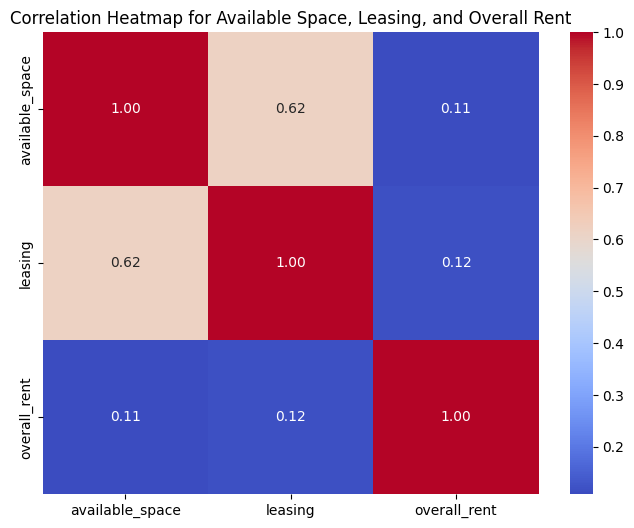

In [4]:
correlation_matrix = west_price_availability[['available_space', 'leasing', 'overall_rent']].corr()
print(correlation_matrix)

plt.figure(figsize = (8, 6))
sns.heatmap(correlation_matrix, annot = True, cmap = 'coolwarm', fmt = '.2f')
plt.title('Correlation Heatmap for Available Space, Leasing, and Overall Rent')
plt.show()

In [5]:
yearly_trends = west_price_availability.groupby('year')[['available_space', 'leasing', 'overall_rent']].mean()
print(yearly_trends)

      available_space        leasing  overall_rent
year                                              
2018     7.780210e+06  979728.166667     37.694436
2019     7.574505e+06  984149.319444     40.660506
2020     8.802290e+06  567761.416667     41.677374
2021     1.117366e+07  728971.097222     41.312087
2022     1.206227e+07  762340.430556     42.204167
2023     1.362181e+07  675157.861111     42.815981
2024     1.428439e+07  793123.083333     43.398487


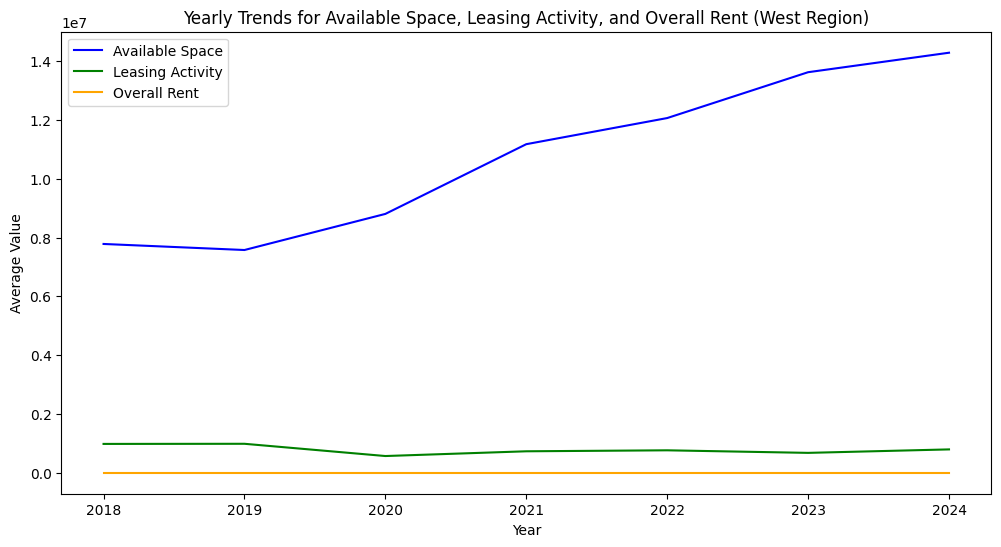

In [6]:
plt.figure(figsize=(12, 6))
plt.plot(yearly_trends.index, yearly_trends['available_space'], label='Available Space', color='blue')
plt.plot(yearly_trends.index, yearly_trends['leasing'], label='Leasing Activity', color='green')
plt.plot(yearly_trends.index, yearly_trends['overall_rent'], label='Overall Rent', color='orange')
plt.title('Yearly Trends for Available Space, Leasing Activity, and Overall Rent (West Region)')
plt.xlabel('Year')
plt.ylabel('Average Value')
plt.legend()
plt.show()

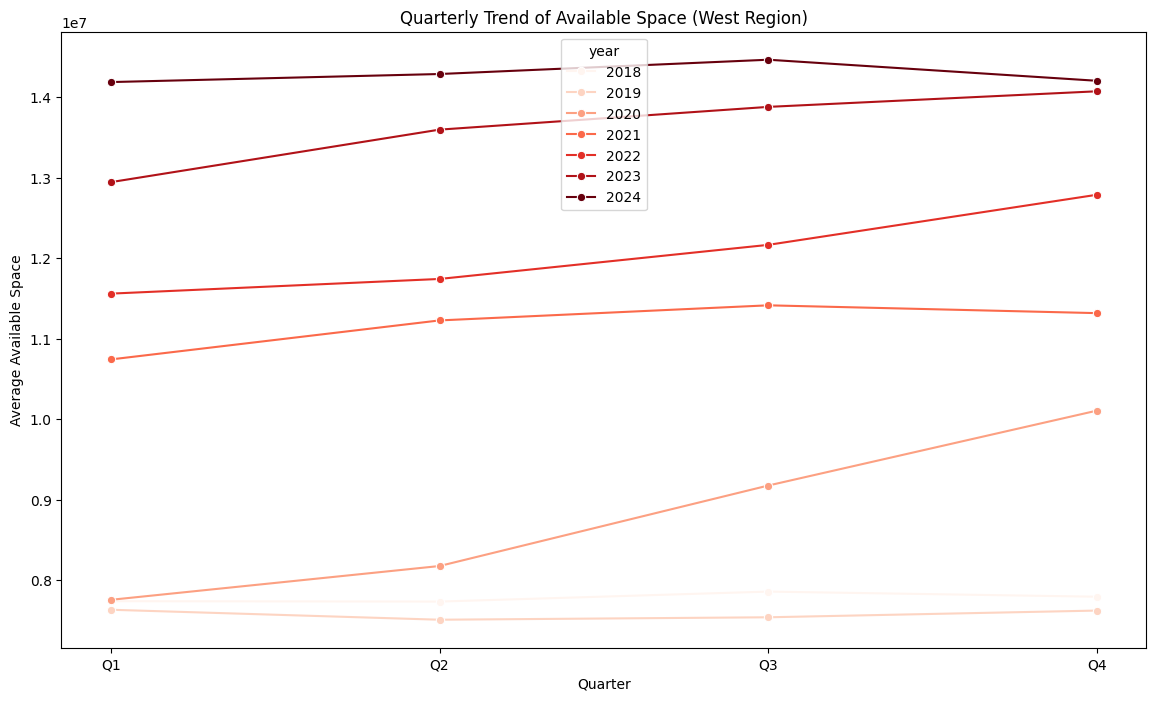

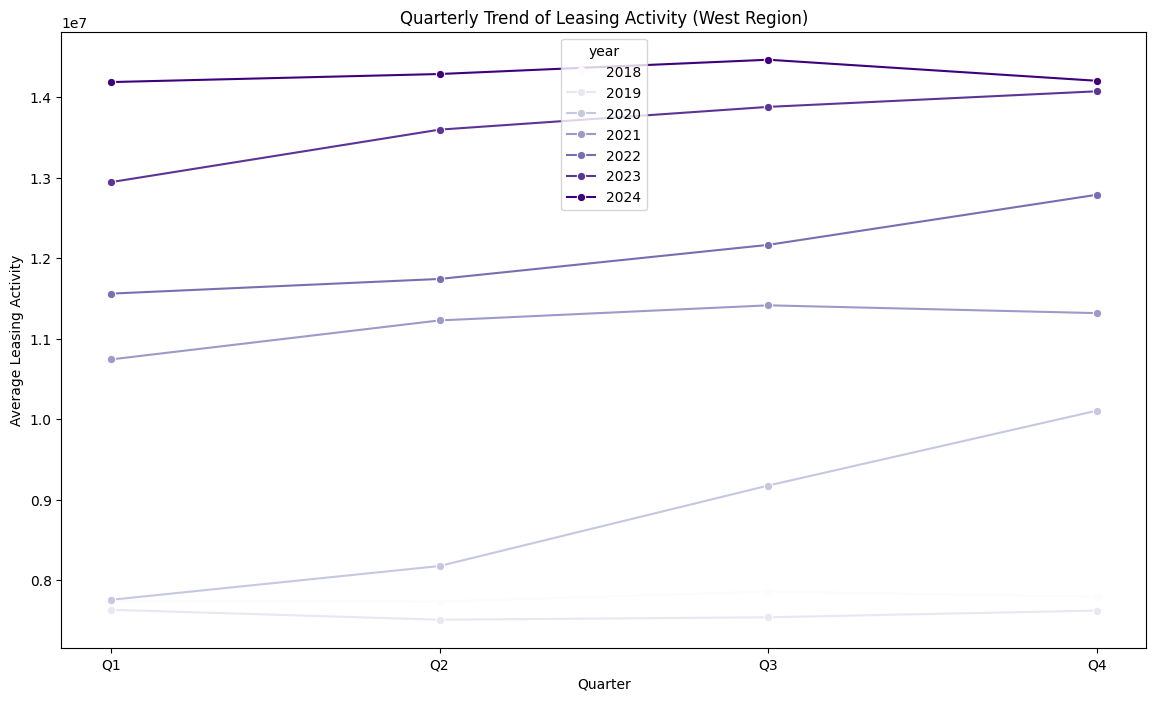

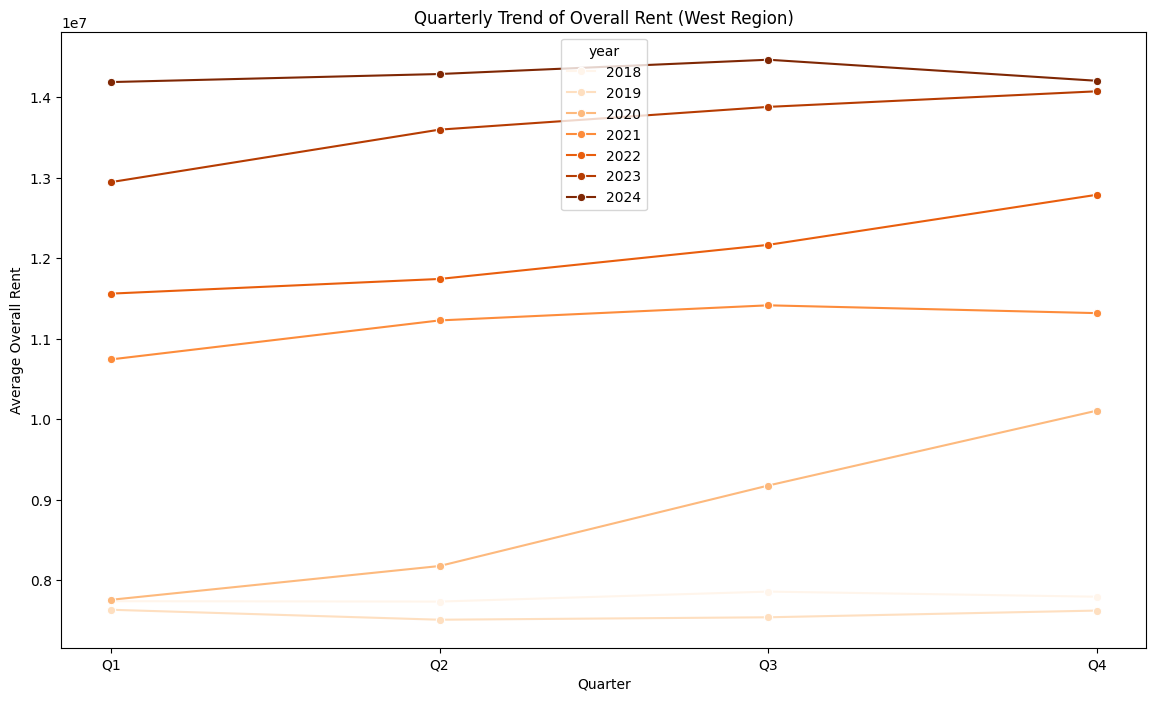

In [7]:
quarterly_trends = west_price_availability.groupby(['year', 'quarter'])[['available_space', 'leasing', 'overall_rent']].mean().reset_index()

plt.figure(figsize = (14, 8))
sns.lineplot(data = quarterly_trends, x = 'quarter', y = 'available_space', hue = 'year', marker = 'o', palette = 'Reds')
plt.title('Quarterly Trend of Available Space (West Region)')
plt.xlabel('Quarter')
plt.ylabel('Average Available Space')
plt.show()

plt.figure(figsize = (14, 8))
sns.lineplot(data = quarterly_trends, x = 'quarter', y = 'available_space', hue = 'year', marker = 'o', palette = 'Purples')
plt.title('Quarterly Trend of Leasing Activity (West Region)')
plt.xlabel('Quarter')
plt.ylabel('Average Leasing Activity')
plt.show()

plt.figure(figsize = (14, 8))
sns.lineplot(data = quarterly_trends, x = 'quarter', y = 'available_space', hue = 'year', marker = 'o', palette = 'Oranges')
plt.title('Quarterly Trend of Overall Rent (West Region)')
plt.xlabel('Quarter')
plt.ylabel('Average Overall Rent')
plt.show()

In [8]:
leases['internal_industry'].isna().sum() / len(leases)
leases['internal_industry'].value_counts()

internal_industry
Financial Services and Insurance                                                                       4253
Technology, Advertising, Media, and Information                                                        3835
TBD                                                                                                    3786
Business, Professional, and Consulting Services (except Financial and Legal) - Including Accounting    2665
Legal Services                                                                                         2109
Construction, Engineering and Architecture                                                             1344
Healthcare                                                                                             1253
Real Estate (except coworking providers)                                                                977
Associations and Non-profit Organizations (except Education and Non-profit Hospitals)                   954
Retail    

C:\Users\rhian\AppData\Local\Temp\ipykernel_5140\1986683400.py:11: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


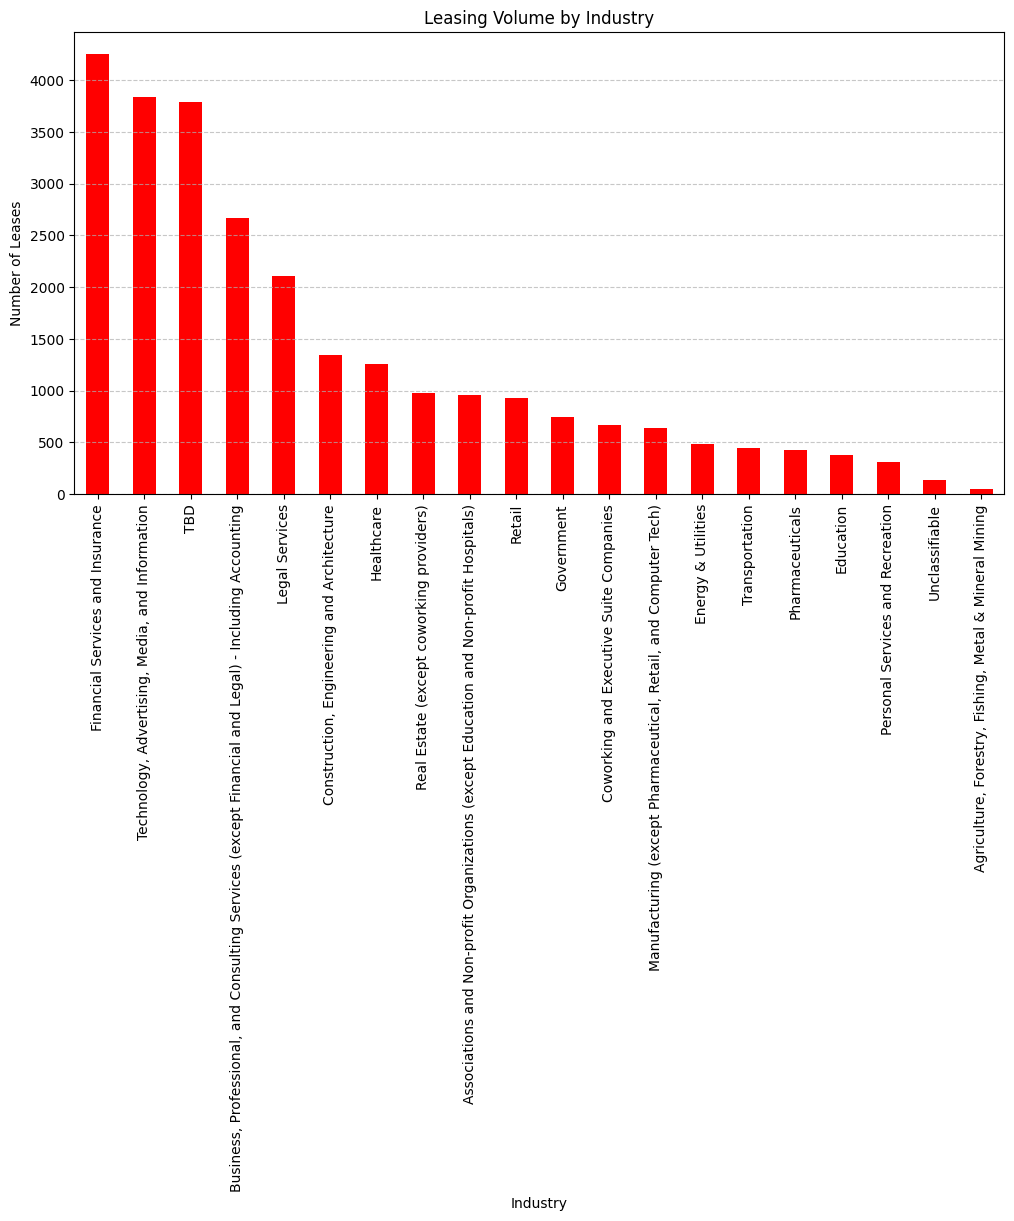

In [9]:
# Distribution of leasing activity across industries
industry_counts = leases['internal_industry'].value_counts()

plt.figure(figsize = (12, 6))
industry_counts.plot(kind = 'bar', color = 'red')
plt.title('Leasing Volume by Industry')
plt.xlabel('Industry')
plt.ylabel('Number of Leases')
plt.xticks(rotation = 90)
plt.grid(axis = 'y', linestyle = '--', alpha = 0.7)
plt.tight_layout()
plt.show()

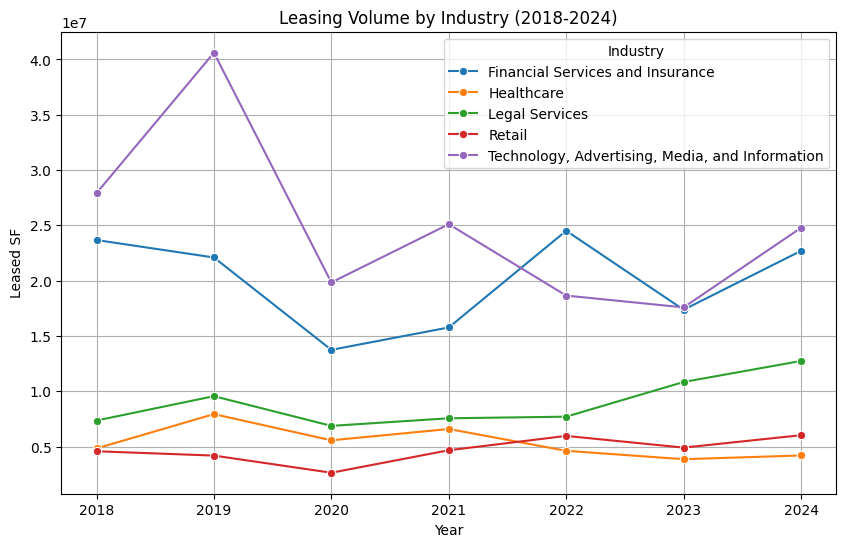

In [10]:
# Leasing Trends across history
key_industries = ['Financial Services and Insurance', 'Technology, Advertising, Media, and Information', 'Legal Services', 'Healthcare', 'Retail']
industry_data = leases[leases['internal_industry'].isin(key_industries)]
industry_trends = industry_data.groupby(['year', 'internal_industry'])['leasedSF'].sum().reset_index()

plt.figure(figsize = (10, 6))
sns.lineplot(data = industry_trends, x = 'year', y = 'leasedSF', hue = 'internal_industry', marker = 'o')
plt.title('Leasing Volume by Industry (2018-2024)')
plt.xlabel('Year')
plt.ylabel('Leased SF')
plt.legend(title='Industry')
plt.grid(True)
plt.show()

In [11]:
pivot_table = industry_trends.pivot(index = 'internal_industry', columns = 'year', values = 'leasedSF')
pivot_table['change'] = ((pivot_table[2024] - pivot_table[2018]) / pivot_table[2018]) * 100
pivot_table[['change']].sort_values('change', ascending = False)

year,change
internal_industry,
Legal Services,73.199782
Retail,31.693415
Financial Services and Insurance,-4.125592
"Technology, Advertising, Media, and Information",-11.214524
Healthcare,-13.145878


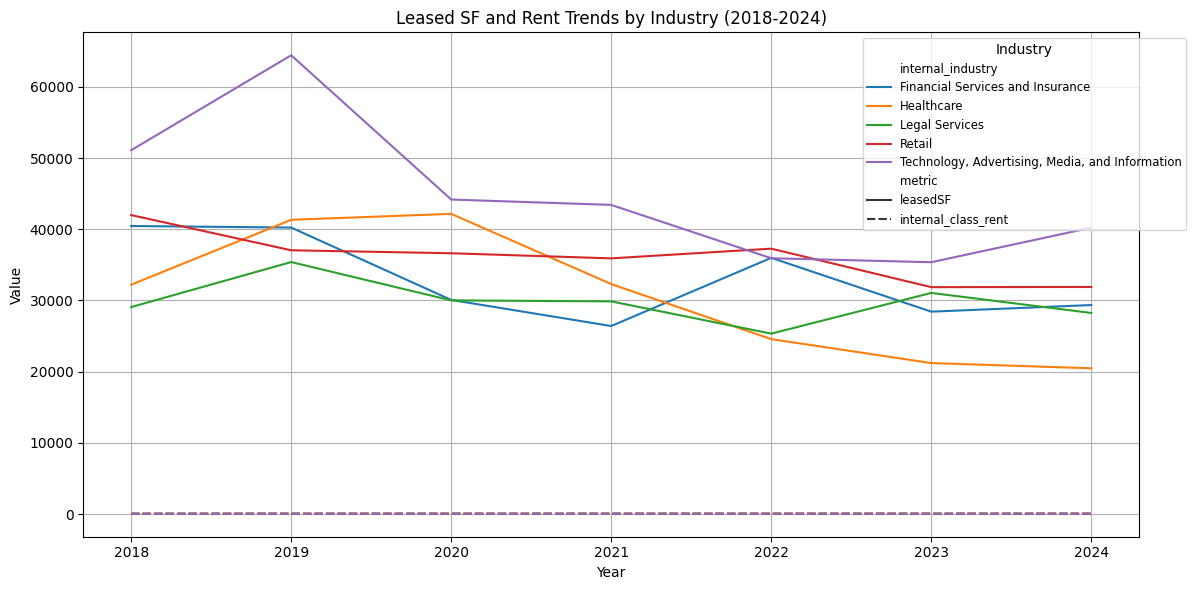

In [15]:
# Note: this code is a little messed up but I wanted to keep it here anyways.

key_industries = ['Legal Services', 'Retail', 'Financial Services and Insurance', 
                  'Technology, Advertising, Media, and Information', 'Healthcare']
industry_data = leases[leases['internal_industry'].isin(key_industries)]

merged_data = pd.merge(
    industry_data[['year', 'internal_industry', 'leasedSF']], 
    price_availability_data[['year', 'market', 'internal_class_rent']], 
    on = ['year'],  
    how = 'left' 
)

merged_data['internal_class_rent'] = merged_data['internal_class_rent'].replace(0, pd.NA)
industry_rent_trends = merged_data.groupby(['year', 'internal_industry'])[['leasedSF', 'internal_class_rent']].mean().reset_index()

melted_data = industry_rent_trends.melt(
    id_vars = ['year', 'internal_industry'], 
    value_vars = ['leasedSF', 'internal_class_rent'],
    var_name = 'metric', 
    value_name = 'value'
)

melted_data = melted_data.dropna()
plt.figure(figsize = (12, 6))

sns.lineplot(
    data = melted_data, x = 'year', y = 'value', hue = 'internal_industry', 
    style = 'metric', dashes = True
)

plt.title('Leased SF and Rent Trends by Industry (2018-2024)')
plt.xlabel('Year')
plt.ylabel('Value')
plt.legend(title = 'Industry', loc = 'upper right', fontsize = 'small', title_fontsize = 'medium', bbox_to_anchor = (1.05, 1))
plt.grid(True)
plt.tight_layout()
plt.show()

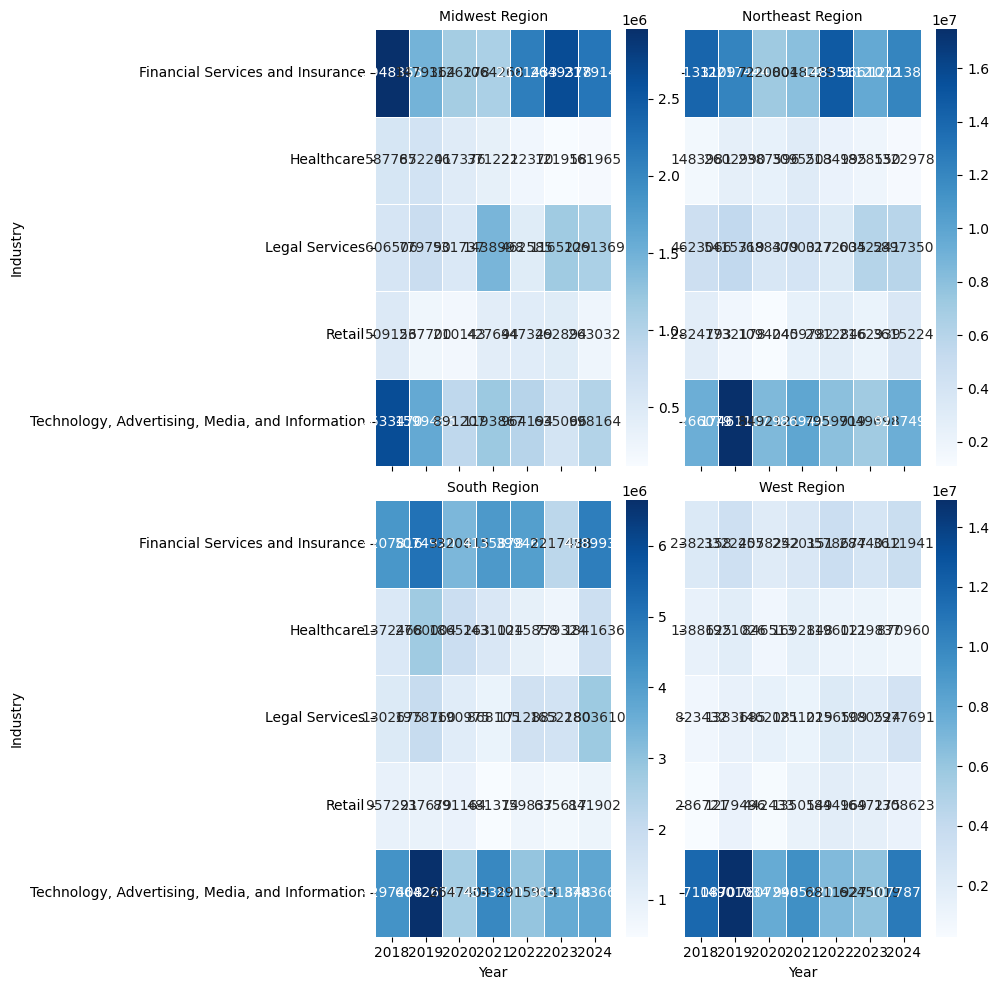

In [20]:
# Possible next step: investigate if certain cities driving the leasing activity for different industries?
region_mapping = {
    'West': ['San Francisco', 'Los Angeles', 'Seattle', 'Denver', 'Phoenix','Orange County','Salt Lake City', 'San Diego', 'South Bay/San Jose'],
    'Midwest': ['Chicago', 'Minneapolis', 'Detroit', 'St. Louis','Chicago Suburbs'],
    'Northeast': ['New York', 'Baltimore', 'Southern Maryland', 'Boston', 'Manhattan', 'Washington D.C.', 'Philadelphia', 'Washington DC', 'Northern New Jersey', 'Northern Virginia'],
    'South': ['Atlanta', 'Austin', 'Dallas', 'Tampa', 'Dallas/Ft Worth', 'Houston', 'Nashville', 'Miami', 'Charlotte', 'Raleigh/Durham','South Florida']
}

leases['region'] = leases['market'].map(lambda x: next((r for r, m in region_mapping.items() if x in m), 'Other'))
geo_trends = leases.groupby(['year', 'region', 'internal_industry'])['leasedSF'].sum().reset_index()
geo_trends = geo_trends[geo_trends['internal_industry'].isin(key_industries)]
g = sns.FacetGrid(geo_trends, col = "region", col_wrap = 2, height = 5, sharex = True, sharey = True)


g.map_dataframe(lambda data, **kws: sns.heatmap(
    data.pivot(index = 'internal_industry', columns = 'year', values = 'leasedSF'),
    cmap = 'Blues', annot = True, fmt = ".0f", linewidths = 0.5, **kws
))

g.set_titles(col_template = "{col_name} Region")
g.set_axis_labels("Year", "Industry")
plt.show()

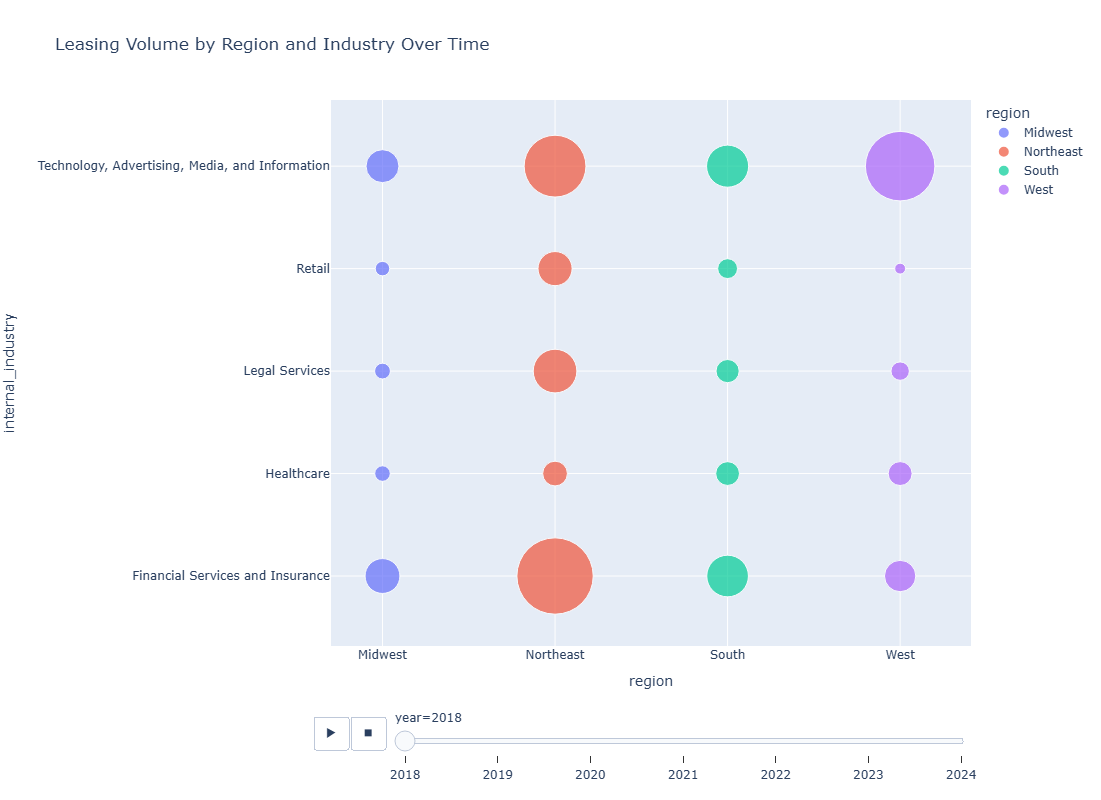

In [21]:
# Animation
import plotly.express as px

fig = px.scatter(
    geo_trends,
    x = 'region',
    y = 'internal_industry',
    size = 'leasedSF',
    color = 'region',
    animation_frame = 'year',
    size_max = 60,
    title = 'Leasing Volume by Region and Industry Over Time'
)

fig.update_layout(height = 800, width = 1000)
fig.show()

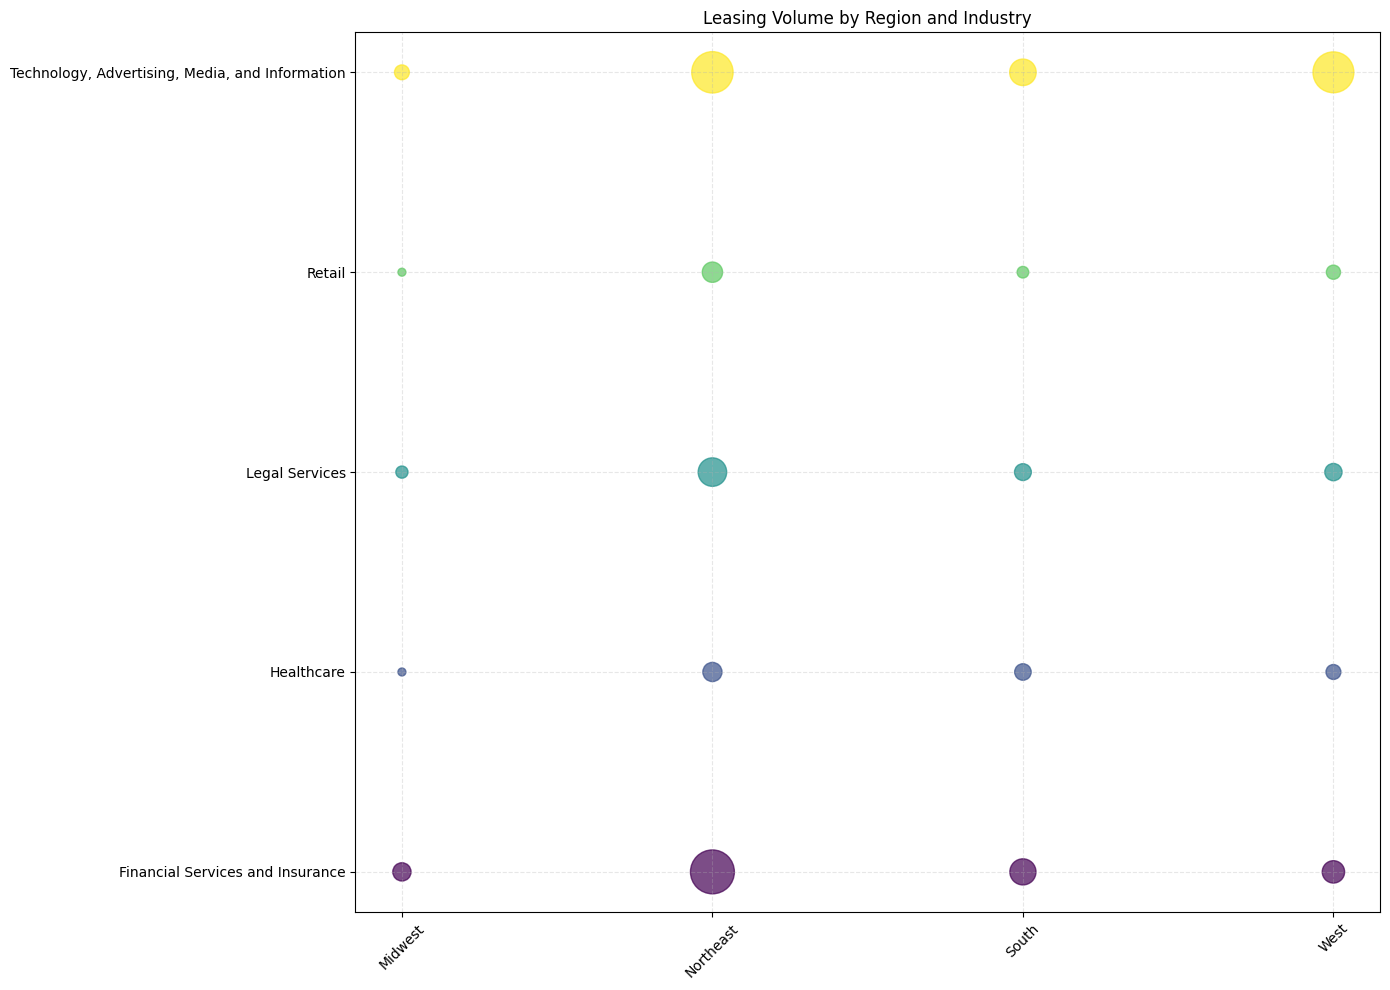

In [24]:
import numpy as np
pivot_data = geo_trends.pivot_table(
    index='region', 
    columns='internal_industry', 
    values='leasedSF', 
    aggfunc='sum'
)

fig, ax = plt.subplots(figsize=(14, 10))
regions = pivot_data.index
industries = pivot_data.columns
colors = plt.cm.viridis(np.linspace(0, 1, len(industries)))

for i, industry in enumerate(industries):
    sizes = pivot_data[industry] / pivot_data.values.max() * 1000
    
    ax.scatter(
        range(len(regions)), 
        [i] * len(regions), 
        s=sizes, 
        color=colors[i], 
        alpha=0.7, 
        label=industry
    )

ax.set_yticks(range(len(industries)))
ax.set_yticklabels(industries)
ax.set_xticks(range(len(regions)))
ax.set_xticklabels(regions, rotation = 45)
ax.grid(linestyle = '--', alpha = 0.3)
ax.set_title('Leasing Volume by Region and Industry')
plt.tight_layout()
plt.show()

<Figure size 1200x800 with 0 Axes>

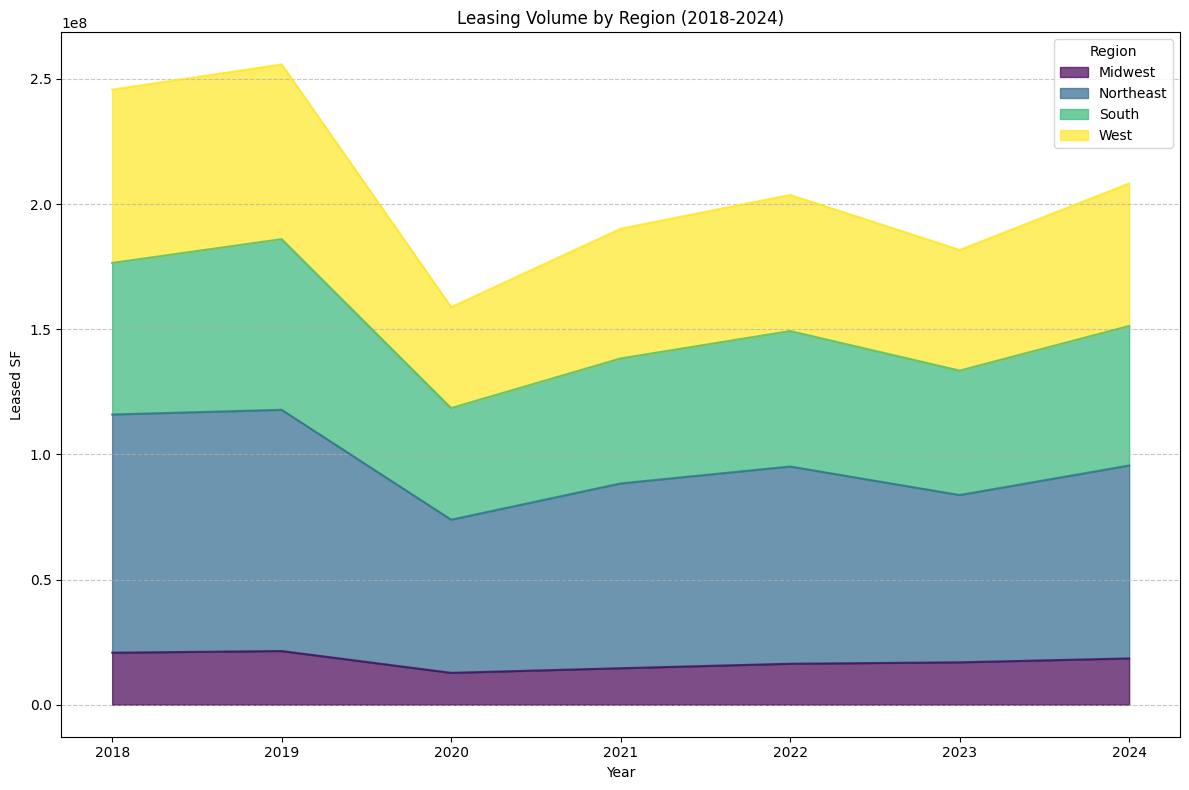

In [25]:
# Stacked area chart
region_trends = leases.groupby(['year', 'region'])['leasedSF'].sum().reset_index()

plt.figure(figsize=(12, 8))
regions = region_trends['region'].unique()
data_by_region = {region: region_trends[region_trends['region'] == region].set_index('year')['leasedSF'] 
                 for region in regions}
df = pd.DataFrame(data_by_region)
df.plot.area(figsize=(12, 8), alpha=0.7, stacked=True, cmap='viridis')
plt.title('Leasing Volume by Region (2018-2024)')
plt.ylabel('Leased SF')
plt.xlabel('Year')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title='Region')
plt.tight_layout()
plt.show()

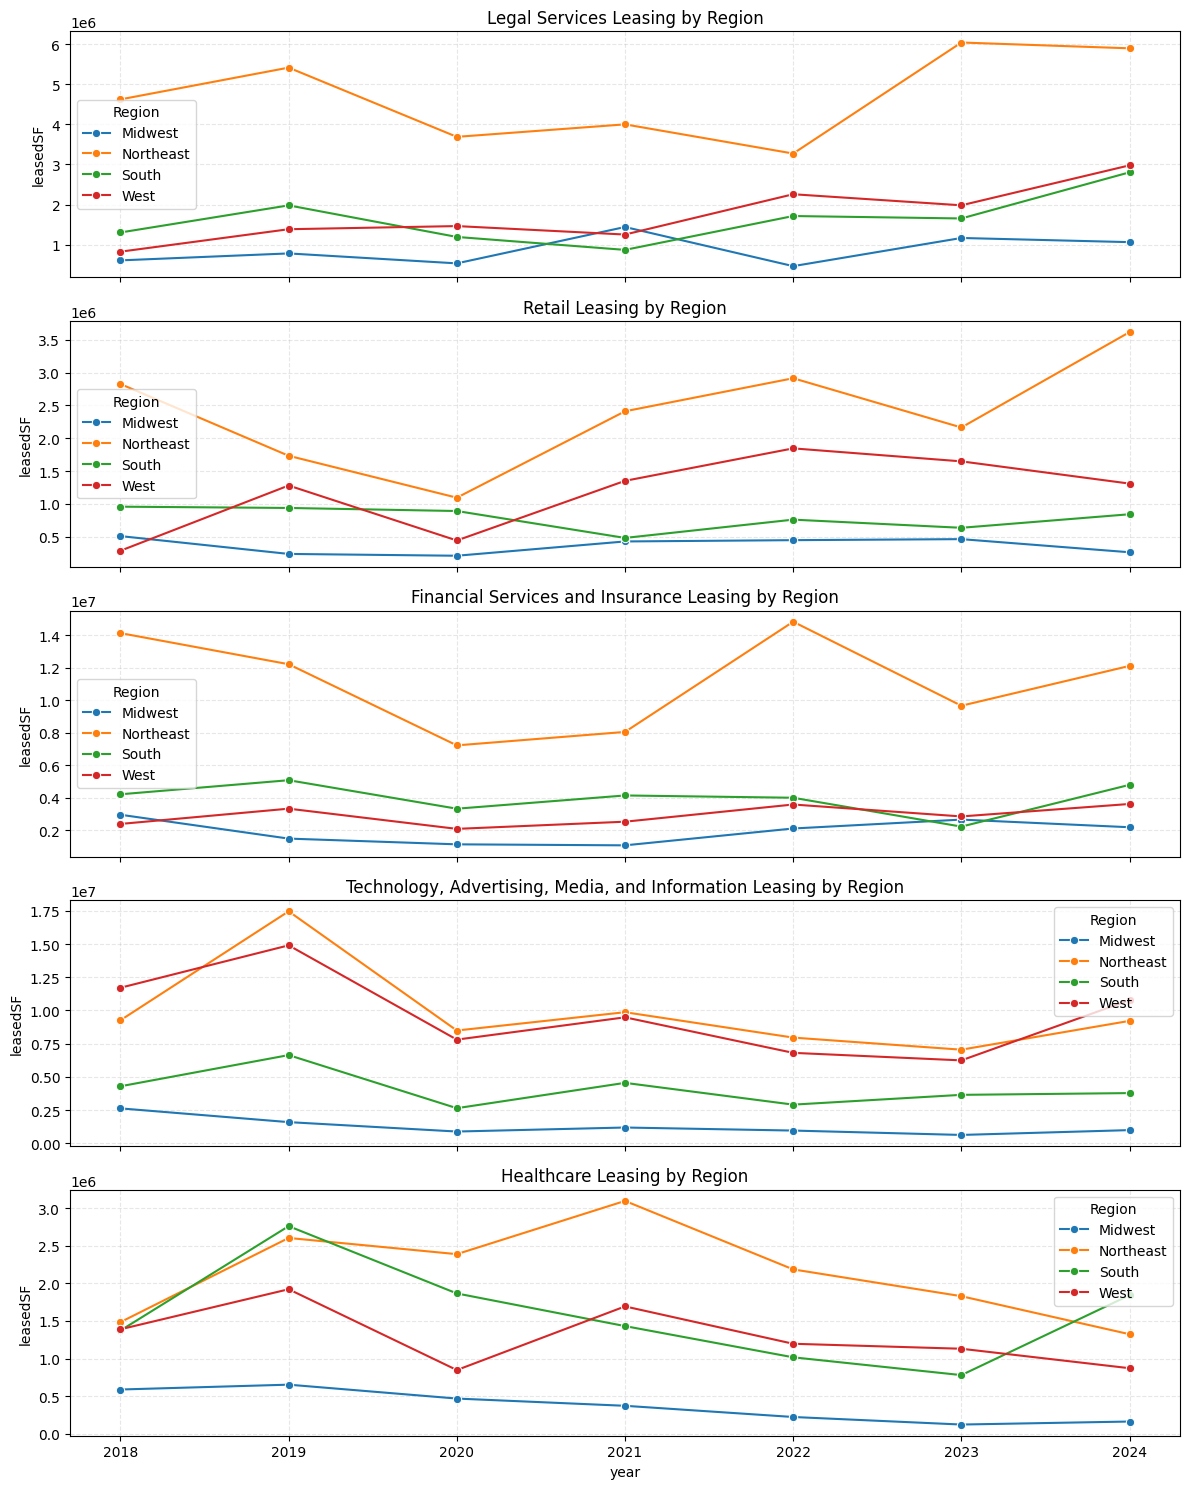

In [26]:
# Small multiple lines chart -- create a line chart for each industry showing regional trends...
fig, axes = plt.subplots(len(key_industries), 1, figsize = (12, 15), sharex = True)

for i, industry in enumerate(key_industries):
    industry_data = geo_trends[geo_trends['internal_industry'] == industry]
    sns.lineplot(
        data = industry_data,
        x = 'year',
        y = 'leasedSF',
        hue = 'region',
        marker = 'o',
        ax = axes[i]
    )
    axes[i].set_title(f'{industry} Leasing by Region')
    axes[i].grid(linestyle = '--', alpha = 0.3)
    axes[i].legend(title = 'Region')

plt.tight_layout()
plt.show()

Need to improve visualizations to convey insights properly

In [38]:
# Radar chart showing regional industry mix for each year?
for year in [2018, 2021, 2024]:  
    year_data = df[df['year'] == year]
    radar_data = year_data.pivot_table(index = 'region', columns = 'industry', values = 'leasedSF', aggfunc = 'sum').fillna(0)
    radar_data = radar_data.reset_index().melt(id_vars = 'region', var_name = 'industry', value_name = 'leasedSF')

    fig = px.line_polar(radar_data, 
                        r = 'leasedSF', 
                        theta = 'industry', 
                        color = 'region', 
                        line_close = True,
                        title = f'Regional Industry Specialization - {year}')
    
    fig.show()

KeyError: 'year'

Another question: are certain industries subleasing more of their space, indicating maybe market instability?

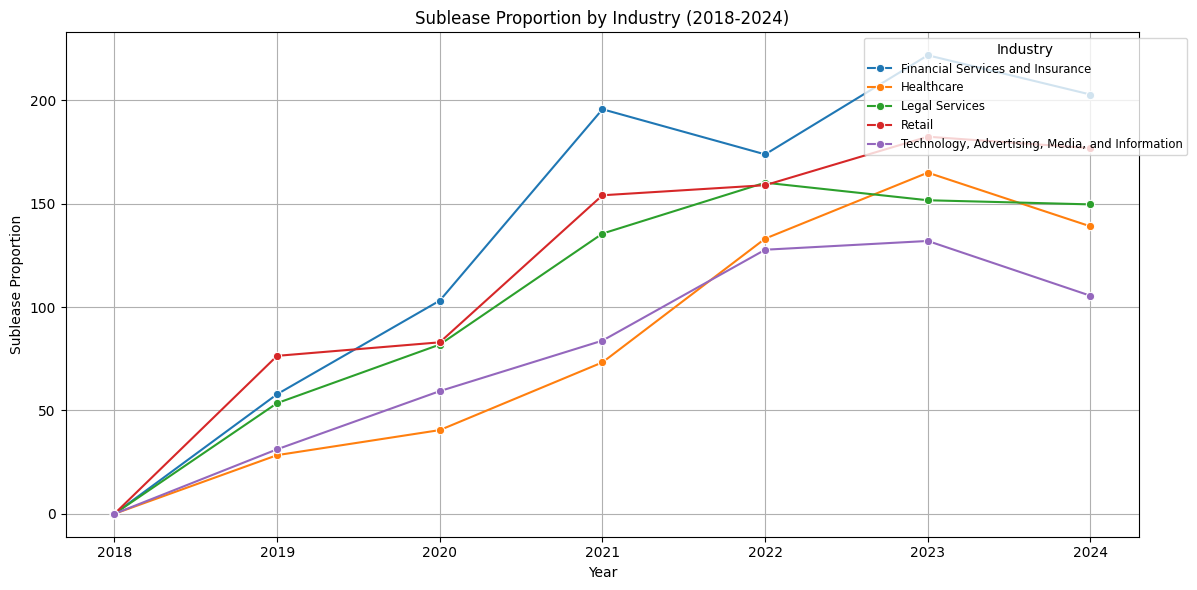

In [28]:
# Group by year and industry to sum sublet space and calc proportion
sublease_trends = leases.groupby(['year', 'internal_industry'])[['sublet_available_space', 'leasedSF']].sum().reset_index()
sublease_trends['sublet_ratio'] = sublease_trends['sublet_available_space'] / sublease_trends['leasedSF']
sublease_trends = sublease_trends[sublease_trends['internal_industry'].isin(key_industries)]


plt.figure(figsize = (12, 6))
sns.lineplot(data = sublease_trends, x = 'year', y = 'sublet_ratio', hue = 'internal_industry', marker = 'o')
plt.title('Sublease Proportion by Industry (2018-2024)')
plt.xlabel('Year')
plt.ylabel('Sublease Proportion')
plt.legend(title = 'Industry', loc = 'upper right', fontsize = 'small', title_fontsize = 'medium', bbox_to_anchor = (1.05, 1))
plt.grid(True) 
plt.tight_layout()
plt.show()

 Are certain industries leasing more or less space in response to rising/falling rent prices?

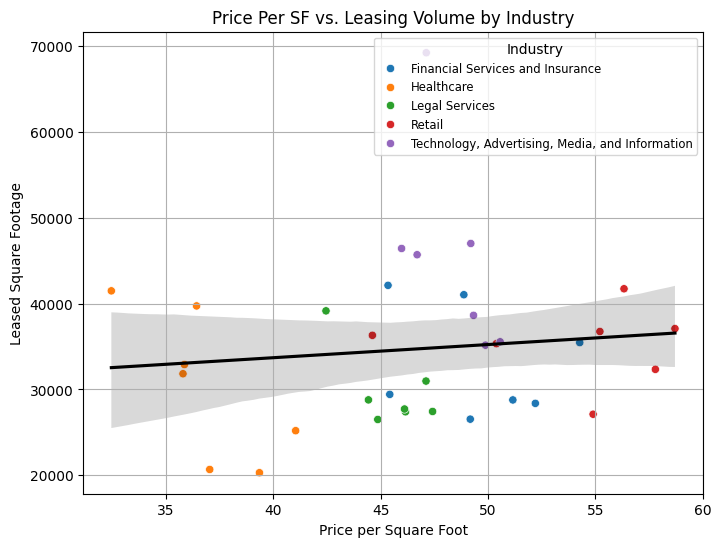

In [42]:
price_trends_grouped_filtered = price_trends_grouped[price_trends_grouped['internal_industry'].isin(key_industries)]

plt.figure(figsize = (8, 6))
sns.scatterplot(data = price_trends_grouped_filtered, x = 'internal_class_rent', y = 'leasedSF', hue = 'internal_industry')
sns.regplot(data = price_trends_grouped_filtered, x = 'internal_class_rent', y = 'leasedSF', scatter = False, color = 'black')
plt.title('Price Per SF vs. Leasing Volume by Industry')
plt.xlabel('Price per Square Foot')
plt.ylabel('Leased Square Footage')
plt.legend(title = 'Industry', loc = 'upper right', fontsize = 'small', title_fontsize = 'medium')
plt.grid(True)
plt.show()

Hypothesis: Are certain industries signing more new leases vs. renewing existing leases?

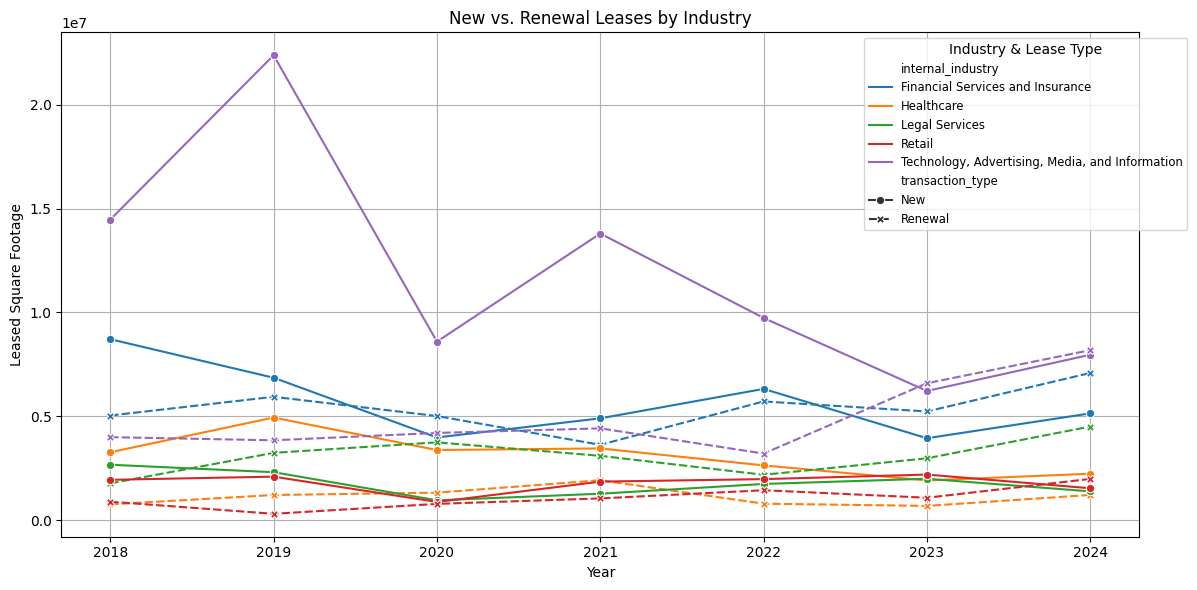

In [47]:
new_renewal_data_filtered = new_renewal_data[new_renewal_data['internal_industry'].isin(key_industries)]
new_renewal_trends = new_renewal_data_filtered.groupby(['year', 'internal_industry', 'transaction_type'])['leasedSF'].sum().reset_index()

plt.figure(figsize = (12, 6))
sns.lineplot(data = new_renewal_trends, x = 'year', y = 'leasedSF', hue = 'internal_industry', style = 'transaction_type', markers = True)
plt.title('New vs. Renewal Leases by Industry')
plt.xlabel('Year')
plt.ylabel('Leased Square Footage')
plt.legend(title = 'Industry & Lease Type', loc = 'upper right', fontsize = 'small', title_fontsize = 'medium', bbox_to_anchor = (1.05, 1))
plt.grid(True)
plt.tight_layout()
plt.show()

What is the best way to visualize this?

<Figure size 1600x1200 with 0 Axes>

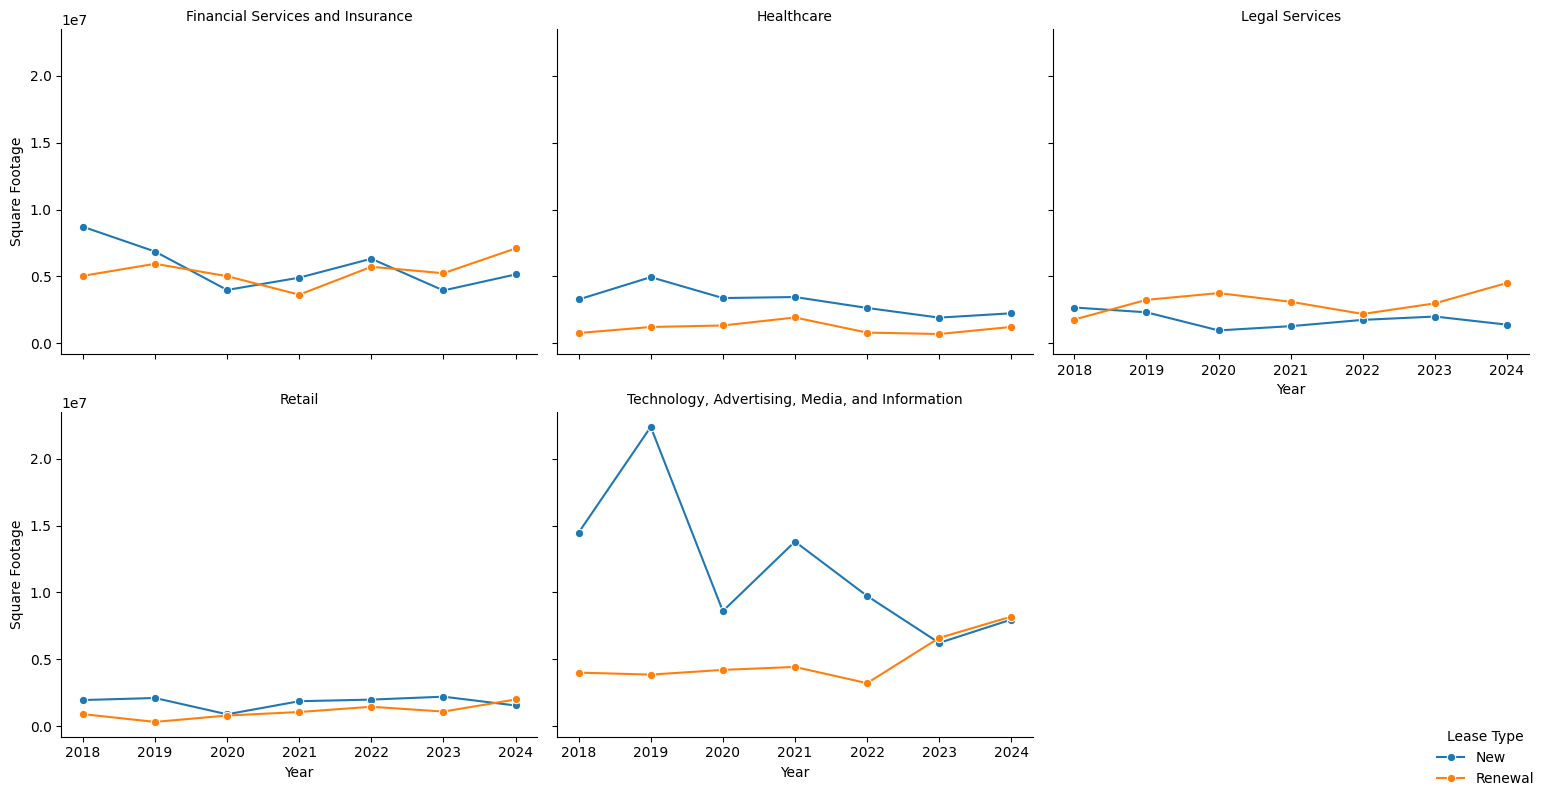

In [59]:
# Modifying info above by making a faceted plot where each industry gets its own subplot
from matplotlib.ticker import FuncFormatter

plt.figure(figsize = (16, 12))
g = sns.FacetGrid(new_renewal_trends, col = 'internal_industry', col_wrap = 3, height = 4, aspect = 1.2)
g.map_dataframe(sns.lineplot, x = 'year', y = 'leasedSF', hue = 'transaction_type', marker = 'o')
g.set_axis_labels("Year", "Square Footage")
g.set_titles("{col_name}")
g.add_legend(title = "Lease Type", fontsize = 'medium', title_fontsize = 'medium', loc = "lower right")
plt.tight_layout()